In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%ls


gdrive/  sample_data/


In [ ]:
%cd /content/gdrive/MyDrive/PM_2.5

/content/gdrive/MyDrive/PM_2.5


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('aerosol.csv')
df.shape

(297360, 50)

In [ ]:
df.head()

,Unnamed: 0,time,lon,lat,BSTAR,CDH,CDM,CDQ,CN,DISPH,EFLUX,EVAP,FRCAN,FRCCN,FRCLS,FRSEAICE,GHTSKIN,HFLUX,HLML,NIRDF,NIRDR,PBLH,PGENTOT,PRECANV,PRECCON,PRECLSC,PRECSNO,PRECTOT,PRECTOTCORR,PREVTOT,QLML,QSH,QSTAR,RHOA,RISFC,SPEED,SPEEDMAX,TAUGWX,TAUGWY,TAUX,TAUY,TCZPBL,TLML,TSH,TSTAR,ULML,USTAR,VLML,Z0H,Z0M
0,0,2000-01-04 00:30:00,76.875,28.5,-0.004888,0.000633,0.000467,0.000633,0.003133,0.250732,0.003513,2.938577e-09,0.0,0.0,0.0,0.0,-65.514534,-5.617138,62.949734,0.000000,0.000000,62.871986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001942,0.001944,3.984860e-08,1.208522,2.697285,2.749119,2.866435,0.000528,-0.000434,0.000937,-0.000845,71.583600,284.26566,276.00552,-0.142454,2.062508,0.032569,-1.784813,0.049398,0.049398
1,1,2000-01-04 00:30:00,77.500,28.5,-0.004815,0.000820,0.000635,0.000820,0.003118,0.246643,0.003513,-7.867129e-10,0.0,0.0,0.0,0.0,-64.858284,-7.085888,62.928250,0.000000,0.000000,62.856360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001893,0.001893,2.595698e-09,1.212184,1.759785,3.306736,3.398661,0.000345,-0.000251,0.001425,-0.001516,72.505480,284.17972,276.14224,-0.140257,2.291756,0.041572,-2.371239,0.048574,0.048574
2,2,2000-01-04 01:30:00,76.875,28.5,-0.004926,0.000591,0.000429,0.000591,0.003133,0.250854,0.001656,-2.379238e-09,0.0,0.0,0.0,0.0,-63.310700,-5.238091,62.882607,0.727783,0.985352,62.814087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001951,0.001953,3.623791e-08,1.210695,2.961655,2.615660,2.659485,0.000632,-0.000279,0.000976,-0.000531,68.571846,283.95685,275.71344,-0.141772,2.317068,0.030425,-1.153747,0.049413,0.049413
3,3,2000-01-04 01:30:00,77.500,28.5,-0.004792,0.000798,0.000614,0.000798,0.003120,0.246765,0.001656,-2.379238e-09,0.0,0.0,0.0,0.0,-61.998200,-6.769341,62.839638,0.943848,1.542969,62.767212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001904,0.001903,-1.014996e-09,1.214723,1.805405,3.240660,3.259094,0.000388,-0.000218,0.001647,-0.001141,69.806220,283.76935,275.90485,-0.137377,2.639333,0.040435,-1.863220,0.048604,0.048604
4,4,2000-01-04 02:30:00,76.875,28.5,-0.002624,0.000744,0.000616,0.000744,0.003135,0.250977,0.004772,1.021363e-09,0.0,0.0,0.0,0.0,-4.809835,-2.417305,62.849472,6.875000,64.281250,62.776054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001960,0.001964,5.277434e-08,1.212150,1.493700,2.650817,2.707057,0.000654,-0.000157,0.001609,-0.000344,66.335830,283.80762,280.74963,-0.059814,2.551734,0.036294,-0.578119,0.049443,0.049443


In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
start_date = '2019-01-03 00:30:00'
end_date = '2020-02-14 23:30:00'

In [ ]:
mask = (df['time'] > start_date) & (df['time'] <= end_date)

In [ ]:
df = df.loc[mask]
df

,Unnamed: 0,time,lon,lat,BSTAR,CDH,CDM,CDQ,CN,DISPH,EFLUX,EVAP,FRCAN,FRCCN,FRCLS,FRSEAICE,GHTSKIN,HFLUX,HLML,NIRDF,NIRDR,PBLH,PGENTOT,PRECANV,PRECCON,PRECLSC,PRECSNO,PRECTOT,PRECTOTCORR,PREVTOT,QLML,QSH,QSTAR,RHOA,RISFC,SPEED,SPEEDMAX,TAUGWX,TAUGWY,TAUX,TAUY,TCZPBL,TLML,TSH,TSTAR,ULML,USTAR,VLML,Z0H,Z0M
271154,271154,2019-01-03 01:30:00,76.875,28.5,-0.004105,0.001593,0.001426,0.001593,0.003129,0.248108,0.258770,1.046701e-07,0.0,0.0,0.909912,0.0,-50.104490,-10.699650,62.517128,0.999512,0.114227,62.390053,6.461050e-08,0.0,0.0,2.761644e-26,0.0,2.761644e-26,1.896422e-26,6.461050e-08,0.003362,0.003425,0.000001,1.225660,0.713649,4.739907,4.882001,0.000879,-0.000788,0.005110,-0.004662,81.77040,282.05978,275.91925,-0.117404,3.504110,0.073965,-3.183528,0.048864,0.048864
271155,271155,2019-01-03 01:30:00,77.500,28.5,-0.004116,0.002481,0.002338,0.002481,0.003114,0.244080,0.711895,2.872093e-07,0.0,0.0,1.000000,0.0,-46.510740,-15.340275,62.543007,1.369141,0.175537,62.405678,5.548645e-08,0.0,0.0,1.409221e-26,0.0,1.409221e-26,5.405275e-27,5.548645e-08,0.003457,0.003573,0.000002,1.228163,0.389430,5.952798,6.137861,0.000574,-0.000482,0.010848,-0.008691,86.73915,282.15744,276.54230,-0.117404,4.614461,0.106039,-3.747981,0.048085,0.048085
271156,271156,2019-01-03 02:30:00,76.875,28.5,-0.002502,0.002966,0.002877,0.002966,0.003130,0.248230,2.333508,9.477726e-07,0.0,0.0,1.000000,0.0,-9.181456,-7.119354,62.447580,20.273438,30.835938,62.319960,2.246816e-07,0.0,0.0,5.036088e-26,0.0,5.036088e-26,6.220010e-26,2.246816e-07,0.003383,0.003668,0.000006,1.227776,0.332767,5.082470,5.239143,0.001025,-0.000745,0.012212,-0.008665,82.13486,281.74304,279.36996,-0.059020,4.129669,0.105989,-2.952134,0.048894,0.048894
271157,271157,2019-01-03 02:30:00,77.500,28.5,-0.002483,0.006121,0.006071,0.006121,0.003116,0.244202,4.614757,1.871645e-06,0.0,0.0,0.972900,0.0,-6.478331,-10.494354,62.451485,20.390625,33.953125,62.319960,1.000008e-07,0.0,0.0,1.317082e-26,0.0,1.317082e-26,1.254289e-27,1.000008e-07,0.003442,0.003757,0.000009,1.230706,0.168705,6.287548,6.358284,0.000659,-0.000455,0.031072,-0.020873,88.72861,281.74695,279.92343,-0.056701,5.168732,0.167665,-3.569322,0.048101,0.048101
271158,271158,2019-01-03 03:30:00,76.875,28.5,0.003134,0.024636,0.023658,0.024636,0.003130,0.248352,11.615036,4.709634e-06,0.0,0.0,1.000000,0.0,41.284470,38.724600,62.546196,40.765625,103.593750,62.411003,2.298039e-07,0.0,0.0,3.325838e-26,0.0,3.325838e-26,3.558331e-25,2.298039e-07,0.003515,0.003726,0.000013,1.226769,-0.145168,4.540440,5.216645,0.000918,-0.000602,0.084926,-0.051644,85.32655,282.16376,284.44590,0.110912,3.875742,0.281656,-2.350908,0.048909,0.048909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284683,284683,2020-02-13 21:30:00,77.500,28.5,-0.002790,0.021556,0.021555,0.021556,0.003398,0.337036,3.513794,1.425782e-06,0.0,0.0,0.169250,0.0,-36.808437,-40.305645,63.719437,0.000000,0.000000,63.472750,3.009291e-10,0.0,0.0,3.720656e-32,0.0,3.720656e-32,0.000000e+00,3.009291e-10,0.006404,0.006466,0.000003,1.195168,0.047194,9.128987,9.159233,0.000805,-0.000458,0.156289,-0.106289,366.72540,286.96063,285.67957,-0.084414,7.614479,0.397575,-5.030995,0.066381,0.066381
284684,284684,2020-02-13 22:30:00,76.875,28.5,-0.002948,0.015857,0.015860,0.015857,0.003404,0.338013,3.415039,1.385031e-06,0.0,0.0,0.822998,0.0,-40.364277,-35.109276,63.486656,0.000000,0.000000,63.254913,8.403731e-09,0.0,0.0,2.739635e-31,0.0,2.739635e-31,2.753008e-35,8.403731e-09,0.006016,0.006102,0.000003,1.196735,0.070580,8.548103,8.562306,0.001464,-0.001058,0.103019,-0.082028,273.92386,285.98430,284.32240,-0.088346,6.732846,0.330680,-5.260768,0.066594,0.066594
284685,284685,2020-02-13 22:30:00,77.500,28.5,-0.002757,0.022189,0.022185,0.022189,0.003399,0.337036,3.290039,1.332877e-06,0.0,0.0,0.846924,0.0,-36.129900,-40.328026,63.617516,0.000000,0.000000,63.379913,5.004040e-09,0

In [ ]:
dfnew=df[['time','QLML','PBLH','SPEED','TLML']]

In [ ]:
dfnew

,time,QLML,PBLH,SPEED,TLML
271154,2019-01-03 01:30:00,0.003362,62.390053,4.739907,282.05978
271155,2019-01-03 01:30:00,0.003457,62.405678,5.952798,282.15744
271156,2019-01-03 02:30:00,0.003383,62.319960,5.082470,281.74304
271157,2019-01-03 02:30:00,0.003442,62.319960,6.287548,281.74695
271158,2019-01-03 03:30:00,0.003515,62.411003,4.540440,282.16376
...,...,...,...,...,...
284683,2020-02-13 21:30:00,0.006404,63.472750,9.128987,286.96063
284684,2020-02-13 22:30:00,0.006016,63.254913,8.548103,285.98430
284685,2020-02-13 22:30:00,0.006376,63.379913,9.177010,286.50775
284686,2020-02-13 23:30:00,0.005991,63.123680,8.573555,285.39230


In [ ]:
df1 = pd.read_csv('combined1.csv' )
df1.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(649632, 54)

In [ ]:
df1.head()

,Unnamed: 0,BCANGSTR,BCCMASS,BCEXTTAU,BCFLUXU,BCFLUXV,BCSCATAU,BCSMASS,DMSCMASS,DMSSMASS,DUANGSTR,DUCMASS,DUCMASS25,DUEXTT25,DUEXTTAU,DUFLUXU,DUFLUXV,DUSCAT25,DUSCATAU,DUSMASS,DUSMASS25,OCANGSTR,OCCMASS,OCEXTTAU,OCFLUXU,OCFLUXV,OCSCATAU,OCSMASS,SO2CMASS,SO2SMASS,SO4CMASS,SO4SMASS,SSANGSTR,SSCMASS,SSCMASS25,SSEXTT25,SSEXTTAU,SSFLUXU,SSFLUXV,SSSCAT25,SSSCATAU,SSSMASS,SSSMASS25,SUANGSTR,SUEXTTAU,SUFLUXU,SUFLUXV,SUSCATAU,TOTANGSTR,TOTEXTTAU,TOTSCATAU,time,lon,lat
0,0,1.402124,0.000004,0.039219,0.000011,-0.000031,0.008162,5.167749e-09,3.095130e-11,2.655677e-33,-0.061309,0.000418,0.000127,0.165772,0.288330,0.002344,-0.003390,0.157837,0.268188,1.639128e-07,4.803587e-08,2.275940,0.000028,0.085839,0.000056,-0.000209,0.082935,2.492016e-08,0.000014,2.212619e-08,0.000018,7.512442e-09,0.046126,0.000011,0.000003,0.004513,0.007827,0.000034,-0.000085,0.004513,0.007827,6.681148e-09,1.743501e-09,2.078678,0.090587,0.000108,-0.000136,0.090587,0.671702,0.511724,0.457678,NaN,NaN,NaN
1,1,1.402124,0.000005,0.048069,0.000019,-0.000032,0.010000,4.767571e-09,5.464079e-11,7.775942e-33,-0.061828,0.000485,0.000146,0.190308,0.332520,0.002716,-0.003183,0.181152,0.309204,1.376611e-07,3.950845e-08,2.268250,0.000034,0.106438,0.000109,-0.000212,0.102955,2.290472e-08,0.000020,2.437446e-08,0.000022,6.912176e-09,0.038741,0.000016,0.000004,0.006337,0.011361,0.000058,-0.000103,0.006337,0.011361,5.597031e-09,1.420631e-09,2.073918,0.110240,0.000130,-0.000132,0.110240,0.699046,0.608648,0.543738,NaN,NaN,NaN
2,2,1.402124,0.000003,0.030469,0.000009,-0.000023,0.006338,4.947651e-09,2.317086e-11,1.002446e-31,-0.060940,0.000375,0.000115,0.149658,0.259522,0.002355,-0.003222,0.142456,0.241455,1.449371e-07,4.265166e-08,2.277143,0.000022,0.066525,0.000043,-0.000158,0.064262,2.414163e-08,0.000014,2.460001e-08,0.000015,7.272389e-09,0.050906,0.000009,0.000003,0.003825,0.006469,0.000032,-0.000071,0.003825,0.006469,5.667971e-09,1.512490e-09,2.089339,0.075644,0.000101,-0.000120,0.075644,0.621334,0.438632,0.394226,NaN,NaN,NaN
3,3,1.402124,0.000004,0.039342,0.000016,-0.000025,0.008185,4.791218e-09,3.765882e-11,1.954337e-31,-0.061306,0.000409,0.000124,0.161987,0.281982,0.002572,-0.002791,0.154236,0.262207,1.310254e-07,3.763125e-08,2.272138,0.000029,0.088925,0.000095,-0.000174,0.085960,2.323213e-08,0.000021,2.626621e-08,0.000018,7.008635e-09,0.045459,0.000012,0.000003,0.004765,0.008293,0.000046,-0.000072,0.004765,0.008293,5.160473e-09,1.325134e-09,2.086654,0.091361,0.000119,-0.000115,0.091361,0.690182,0.509799,0.456116,NaN,NaN,NaN
4,4,1.402152,0.000003,0.024137,0.000009,-0.000018,0.005021,4.052708e-09,1.767126e-11,1.376405e-26,-0.060852,0.000359,0.000110,0.143372,0.248474,0.002471,-0.003221,0.136475,0.231201,1.234002e-07,3.598689e-08,2.275857,0.000016,0.049924,0.000041,-0.000113,0.048242,2.020533e-08,0.000012,2.099841e-08,0.000014,6.561225e-09,0.053678,0.000008,0.000003,0.003551,0.005916,0.000035,-0.000066,0.003551,0.005916,4.325559e-09,1.190983e-09,2.101386,0.067100,0.000100,-0.000112,0.067100,0.556180,0.395562,0.357508,NaN,NaN,NaN


In [ ]:
df1['time'] = pd.to_datetime(df1['time'])
start_date = '2019-01-03 00:30:00'
end_date = '2020-02-14 23:30:00'
mask = (df1['time'] > start_date) & (df1['time'] <= end_date)
df1 = df1.loc[mask]
df1

,Unnamed: 0,BCANGSTR,BCCMASS,BCEXTTAU,BCFLUXU,BCFLUXV,BCSCATAU,BCSMASS,DMSCMASS,DMSSMASS,DUANGSTR,DUCMASS,DUCMASS25,DUEXTT25,DUEXTTAU,DUFLUXU,DUFLUXV,DUSCAT25,DUSCATAU,DUSMASS,DUSMASS25,OCANGSTR,OCCMASS,OCEXTTAU,OCFLUXU,OCFLUXV,OCSCATAU,OCSMASS,SO2CMASS,SO2SMASS,SO4CMASS,SO4SMASS,SSANGSTR,SSCMASS,SSCMASS25,SSEXTT25,SSEXTTAU,SSFLUXU,SSFLUXV,SSSCAT25,SSSCATAU,SSSMASS,SSSMASS25,SUANGSTR,SUEXTTAU,SUFLUXU,SUFLUXV,SUSCATAU,TOTANGSTR,TOTEXTTAU,TOTSCATAU,time,lon,lat
621696,0,1.404133,0.000004,0.041358,0.000030,-0.000026,0.008685,7.719791e-09,4.392014e-12,1.297316e-24,-0.057880,0.000082,0.000028,0.037022,0.061582,0.000598,-0.000542,0.035251,0.057460,6.027403e-08,1.987064e-08,2.203997,0.000017,0.067862,0.000125,-0.000107,0.066086,2.862362e-08,0.000009,1.586159e-08,0.000017,2.043943e-08,0.095814,0.000002,8.435256e-07,0.001444,0.001986,0.000015,-0.000012,0.001444,0.001986,1.290573e-09,6.739356e-10,1.963549,0.113395,0.000117,-0.000106,0.113395,1.363081,0.286152,0.247584,2019-01-04 00:30:00,76.875,28.5
621697,1,1.402973,0.000004,0.038566,0.000033,-0.000025,0.008063,7.472409e-09,3.633510e-12,2.572661e-23,-0.057407,0.000076,0.000026,0.034459,0.057111,0.000616,-0.000506,0.032810,0.053294,5.983747e-08,1.981243e-08,2.207781,0.000016,0.063101,0.000136,-0.000102,0.061448,2.788147e-08,0.000016,2.993329e-08,0.000016,2.019204e-08,0.096852,0.000002,8.013832e-07,0.001349,0.001854,0.000015,-0.000012,0.001349,0.001854,1.311491e-09,6.723440e-10,1.960008,0.109642,0.000133,-0.000105,0.109642,1.372847,0.270283,0.234279,2019-01-04 00:30:00,77.500,28.5
621698,2,1.408495,0.000004,0.038969,0.000029,-0.000023,0.008334,7.479684e-09,7.323026e-12,1.323570e-24,-0.057372,0.000077,0.000027,0.035112,0.058206,0.000559,-0.000488,0.033433,0.054313,5.752373e-08,1.896115e-08,2.166015,0.000016,0.066920,0.000123,-0.000095,0.065265,2.751767e-08,0.000009,1.487933e-08,0.000016,1.880974e-08,0.088579,0.000002,8.099868e-07,0.001468,0.002029,0.000015,-0.000012,0.001468,0.002029,1.218268e-09,6.273240e-10,1.943310,0.106686,0.000113,-0.000093,0.106686,1.355605,0.272790,0.236630,2019-01-04 01:30:00,76.875,28.5
621699,3,1.406176,0.000004,0.036832,0.000032,-0.000023,0.007803,7.423296e-09,6.269646e-12,2.137745e-23,-0.056945,0.000071,0.000025,0.032534,0.053720,0.000568,-0.000456,0.030969,0.050148,5.781477e-08,1.925219e-08,2.187500,0.000015,0.062022,0.000132,-0.000094,0.060444,2.751040e-08,0.000017,3.007881e-08,0.000015,1.932633e-08,0.092425,0.000002,7.580656e-07,0.001333,0.001841,0.000015,-0.000011,0.001333,0.001841,1.241915e-09,6.355094e-10,1.943554,0.104488,0.000127,-0.000095,0.104488,1.373671,0.258874,0.224728,2019-01-04 01:30:00,77.500,28.5
621700,4,1.415890,0.000004,0.037892,0.000028,-0.000021,0.008364,7.376002e-09,8.042737e-12,3.278834e-24,-0.056859,0.000074,0.000026,0.033876,0.055962,0.000522,-0.000447,0.032258,0.052222,5.507904e-08,1.819719e-08,2.068994,0.000016,0.071436,0.000120,-0.000087,0.069812,2.695015e-08,0.000009,1.439548e-08,0.000015,1.753689e-08,0.082722,0.000002,7.968053e-07,0.001531,0.002123,0.000016,-0.000011,0.001531,0.002123,1.162334e-09,5.939000e-10,1.912372,0.104091,0.000110,-0.000085,0.104091,1.346899,0.271455,0.236621,2019-01-04 02:30:00,76.875,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634891,43,1.404709,0.000002,0.020032,0.000028,-0.000020,0.004217,2.927664e-09,1.724203e-11,4.122978e-23,-0.061569,0.000067,0.000022,0.028080,0.048209,0.000794,-0.000587,0.026728,0.044896,3.473542e-08,1.004810e-08,2.200270,0.000009,0.035868,0.000130,-0.000080,0.034946,1.097579e-08,0.000012,2.110028e-08,0.000013,7.154345e-09,0.046855,0.000004,1.304820e-06,0.002119,0.003480,0.000044,-0.000036,0.002119,0.003480,1.547313e-09,4.127677e-10,1.952241,0.086186,0.000150,-0.000125,0.086186,1.266829,0.193795,0.173728,2020-02-13 21:30:00,77.500,28.5
634892,44,1.404942,0.000003,0.026881,0.000033,-0.000027,0.005664,3.21

In [ ]:
df1new=df1[['time','BCSMASS','DUSMASS25','OCSMASS','SO4SMASS','SSSMASS25']]

In [ ]:
df1new

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25
621696,2019-01-04 00:30:00,7.719791e-09,1.987064e-08,2.862362e-08,2.043943e-08,6.739356e-10
621697,2019-01-04 00:30:00,7.472409e-09,1.981243e-08,2.788147e-08,2.019204e-08,6.723440e-10
621698,2019-01-04 01:30:00,7.479684e-09,1.896115e-08,2.751767e-08,1.880974e-08,6.273240e-10
621699,2019-01-04 01:30:00,7.423296e-09,1.925219e-08,2.751040e-08,1.932633e-08,6.355094e-10
621700,2019-01-04 02:30:00,7.376002e-09,1.819719e-08,2.695015e-08,1.753689e-08,5.939000e-10
...,...,...,...,...,...,...
634891,2020-02-13 21:30:00,2.927664e-09,1.004810e-08,1.097579e-08,7.154345e-09,4.127677e-10
634892,2020-02-13 22:30:00,3.213247e-09,1.062654e-08,1.188166e-08,6.836630e-09,3.899918e-10
634893,2020-02-13 22:30:00,3.063180e-09,1.011722e-08,1.151058e-08,7.387784e-09,4.242116e-10
634894,2020-02-13 23:30:00,3.392419e-09,1.092485e-08,1.255833e-08,7.245332e-09,4.115097e-10


In [ ]:
df3 = pd.merge(df1new, dfnew)
df3

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML
0,2019-01-05 00:30:00,8.058123e-09,1.454828e-08,3.052992e-08,1.815402e-08,4.786217e-10,0.004006,62.500870,5.699530,282.57007
1,2019-01-05 00:30:00,8.058123e-09,1.454828e-08,3.052992e-08,1.815402e-08,4.786217e-10,0.004100,62.672745,5.178045,283.35132
2,2019-01-05 00:30:00,7.108611e-09,1.503940e-08,2.701563e-08,1.774656e-08,4.981758e-10,0.004006,62.500870,5.699530,282.57007
3,2019-01-05 00:30:00,7.108611e-09,1.503940e-08,2.701563e-08,1.774656e-08,4.981758e-10,0.004100,62.672745,5.178045,283.35132
4,2019-01-05 01:30:00,8.287316e-09,1.432272e-08,3.134483e-08,1.776129e-08,4.724832e-10,0.004031,62.372560,5.714055,282.00223
...,...,...,...,...,...,...,...,...,...,...
18331,2020-02-13 22:30:00,3.063180e-09,1.011722e-08,1.151058e-08,7.387784e-09,4.242116e-10,0.006376,63.379913,9.177010,286.50775
18332,2020-02-13 23:30:00,3.392419e-09,1.092485e-08,1.255833e-08,7.245332e-09,4.115097e-10,0.005991,63.123680,8.573555,285.39230
18333,2020-02-13 23:30:00,3.392419e-09,1.092485e-08,1.255833e-08,7.245332e-09,4.115097e-10,0.006306,63.248680,9.198555,285.97824
18334,2020-02-13 23:30:00,3.210520e-09,1.022272e-08,1.208176e-08,7.630958e-09,4.353839e-10,0.005991,63.123680,8.573555,285.39230


In [ ]:
df3 = df3.drop_duplicates('time')
print(df3)

                     time       BCSMASS  ...     SPEED       TLML
0     2019-01-05 00:30:00  8.058123e-09  ...  5.699530  282.57007
4     2019-01-05 01:30:00  8.287316e-09  ...  5.714055  282.00223
8     2019-01-05 02:30:00  8.501956e-09  ...  5.596713  281.62170
12    2019-01-05 03:30:00  8.341885e-09  ...  4.250904  282.29440
16    2019-01-05 04:30:00  7.563358e-09  ...  3.031712  284.87622
...                   ...           ...  ...       ...        ...
18316 2020-02-13 19:30:00  2.663910e-09  ...  8.884251  288.18518
18320 2020-02-13 20:30:00  2.863999e-09  ...  8.839270  287.29504
18324 2020-02-13 21:30:00  3.040441e-09  ...  8.628987  286.56220
18328 2020-02-13 22:30:00  3.213247e-09  ...  8.548103  285.98430
18332 2020-02-13 23:30:00  3.392419e-09  ...  8.573555  285.39230

[4584 rows x 10 columns]


In [ ]:
df3.to_csv('file1.csv')

NameError: ignored

In [ ]:
import pandas as pd
ff = pd.read_csv('file1.csv')

In [ ]:
ff

,Unnamed: 0,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML,PM2.5
0,0.0,05-01-2019 0.30,8.060000e-09,1.450000e-08,3.050000e-08,1.820000e-08,4.790000e-10,0.004006,62.500870,5.699530,282.57007,79.0
1,4.0,05-01-2019 1.30,8.290000e-09,1.430000e-08,3.130000e-08,1.780000e-08,4.720000e-10,0.004031,62.372560,5.714055,282.00223,77.0
2,8.0,05-01-2019 2.30,8.500000e-09,1.400000e-08,3.210000e-08,1.740000e-08,4.620000e-10,0.004063,62.285614,5.596713,281.62170,83.0
3,12.0,05-01-2019 3.30,8.340000e-09,1.360000e-08,3.140000e-08,1.680000e-08,4.360000e-10,0.004137,62.437950,4.250904,282.29440,88.0
4,16.0,05-01-2019 4.30,7.560000e-09,1.280000e-08,2.840000e-08,1.630000e-08,3.980000e-10,0.004280,80.280690,3.031712,284.87622,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0
8420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
8421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
8422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [ ]:
del ff['Unnamed: 0']
ff

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML,PM2.5
0,05-01-2019 0.30,8.060000e-09,1.450000e-08,3.050000e-08,1.820000e-08,4.790000e-10,0.004006,62.500870,5.699530,282.57007,79.0
1,05-01-2019 1.30,8.290000e-09,1.430000e-08,3.130000e-08,1.780000e-08,4.720000e-10,0.004031,62.372560,5.714055,282.00223,77.0
2,05-01-2019 2.30,8.500000e-09,1.400000e-08,3.210000e-08,1.740000e-08,4.620000e-10,0.004063,62.285614,5.596713,281.62170,83.0
3,05-01-2019 3.30,8.340000e-09,1.360000e-08,3.140000e-08,1.680000e-08,4.360000e-10,0.004137,62.437950,4.250904,282.29440,88.0
4,05-01-2019 4.30,7.560000e-09,1.280000e-08,2.840000e-08,1.630000e-08,3.980000e-10,0.004280,80.280690,3.031712,284.87622,83.0
...,...,...,...,...,...,...,...,...,...,...,...
8419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0
8420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
8421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
8422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [ ]:
ff.dropna(subset = ["time"], inplace=True)

In [ ]:
del ff["time"]
ff=ff.dropna()
ff

,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML,PM2.5
0,8.060000e-09,1.450000e-08,3.050000e-08,1.820000e-08,4.790000e-10,0.004006,62.500870,5.699530,282.57007,79.0
1,8.290000e-09,1.430000e-08,3.130000e-08,1.780000e-08,4.720000e-10,0.004031,62.372560,5.714055,282.00223,77.0
2,8.500000e-09,1.400000e-08,3.210000e-08,1.740000e-08,4.620000e-10,0.004063,62.285614,5.596713,281.62170,83.0
3,8.340000e-09,1.360000e-08,3.140000e-08,1.680000e-08,4.360000e-10,0.004137,62.437950,4.250904,282.29440,88.0
4,7.560000e-09,1.280000e-08,2.840000e-08,1.630000e-08,3.980000e-10,0.004280,80.280690,3.031712,284.87622,83.0
...,...,...,...,...,...,...,...,...,...,...
4579,2.660000e-09,1.020000e-08,9.920000e-09,5.740000e-09,3.480000e-10,0.005806,63.734660,8.884251,288.18518,80.0
4580,2.860000e-09,1.030000e-08,1.060000e-08,6.140000e-09,3.570000e-10,0.005943,63.548187,8.839270,287.29504,35.0
4581,3.040000e-09,1.040000e-08,1.120000e-08,6.480000e-09,3.710000e-10,0.006013,63.379000,8.628987,286.56220,33.0
4582,3.210000e-09,1.060000e-08,1.190000e-08,6.840000e-09,3.900000e-10,0.006016,63.254913,8.548103,285.98430,25.0


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X=ff.iloc[:,:-1] ## independent features
y=ff.iloc[:,-1] ## dependent features

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.35,
                                                    random_state=4
                                                   )

In [ ]:
X_train

array([[1.4400000e-09, 1.0400000e-08, 5.1500000e-09, ..., 4.2252680e+02,
        4.7680560e+00, 3.0258557e+02],
       [6.3600000e-09, 4.7400000e-08, 2.2800000e-08, ..., 6.5429190e+01,
        4.9851748e-01, 2.9581314e+02],
       [2.6800000e-09, 9.4800000e-09, 9.9200000e-09, ..., 7.8239840e+01,
        3.3067477e+00, 3.0066910e+02],
       ...,
       [5.7000000e-09, 3.2000000e-08, 2.2500000e-08, ..., 6.6689080e+01,
        2.7946203e+00, 3.0150302e+02],
       [3.3200000e-09, 1.6600000e-08, 1.2800000e-08, ..., 1.2688329e+03,
        3.9924529e+00, 2.8927448e+02],
       [1.6700000e-09, 2.2900000e-08, 6.6300000e-09, ..., 4.1112808e+02,
        5.9130750e+00, 3.0272177e+02]])

In [ ]:
y_train

array([25., 56., 40., ..., 16., 69., 14.])

In [ ]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
model = Sequential()
model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='elu'))
model.add(Dense(2670, activation='elu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 2670)              26700     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2671      
Total params: 29,461
Trainable params: 29,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=100, batch_size=15, verbose=1, validation_split=0.35)
predictions = model.predict(xval_scale)

Epoch 1/100
128/128 [==============================] - 4s 6ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0663 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0605
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0644 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0604
Epoch 3/100
128/128 [==============================] - 1s 4ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0647 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0650
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0639 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0658
Epoch 5/100
128/128 [==============================] - 1s 4ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0642 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0608
Epoch 6/100
128/128 [==============================] - 1s 5ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0645 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0639
Epoch 7/10

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


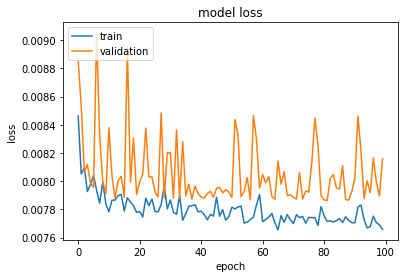

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


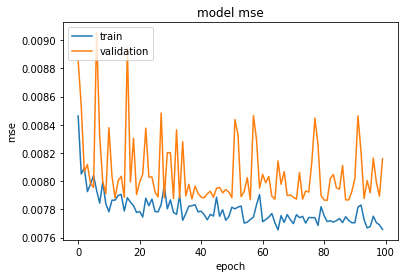

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


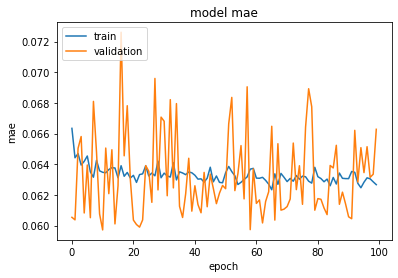

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[45.151733],
       [45.452965],
       [53.414917],
       ...,
       [39.605637],
       [35.540688],
       [50.67831 ]], dtype=float32)

In [ ]:

# Dump weights
for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

Streaming output truncated to the last 5000 lines.
L1N8                   -> L2N341 = 0.00613713264465332
L1N8                   -> L2N342 = -0.0011463819537311792
L1N8                   -> L2N343 = 0.01956658437848091
L1N8                   -> L2N344 = -0.009038485586643219
L1N8                   -> L2N345 = -0.010289533995091915
L1N8                   -> L2N346 = 0.010390718467533588
L1N8                   -> L2N347 = -0.00634103175252676
L1N8                   -> L2N348 = -0.011062586680054665
L1N8                   -> L2N349 = -0.012445144355297089
L1N8                   -> L2N350 = 0.003789604874327779
L1N8                   -> L2N351 = -0.013488009572029114
L1N8                   -> L2N352 = -0.0197016391903162
L1N8                   -> L2N353 = 0.00018025090685114264
L1N8                   -> L2N354 = -0.005163991823792458
L1N8                   -> L2N355 = 0.002499381313100457
L1N8                   -> L2N356 = 0.004100129473954439
L1N8                   -> L2N357 = 0.006994435

In [ ]:
#Extratree_Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.         0.04408319 0.00351536 0.00352187 0.         0.26454066
 0.22513933 0.21322755 0.24597203]


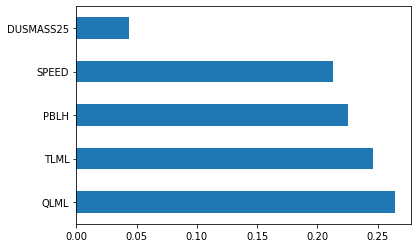

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


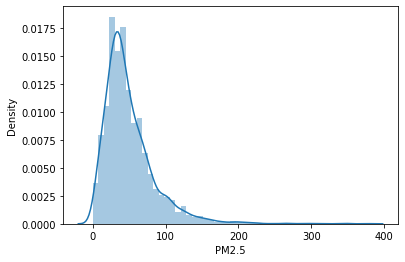

In [ ]:
#decisiontree
import seaborn as sns
sns.distplot(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 1.0


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: -0.2661570720151736


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [ ]:
score.mean()

-4.182199959462109

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
!pip install pydotplus
!pip install python-graphviz
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


KeyError: ignored

In [ ]:
features = list(X.columns[:-1])
features

['BCSMASS',
 'DUSMASS25',
 'OCSMASS',
 'SO4SMASS',
 'SSSMASS25',
 'QLML',
 'PBLH',
 'SPEED']

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ValueError: ignored

In [ ]:
#Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.coef_

array([ 1.62812065e+09,  1.50419094e+08, -3.16587651e+08, -2.26218241e+08,
        1.48309535e+09,  3.04926648e+02,  5.84554672e-03, -3.48748818e-01,
        2.42197860e-01])

In [ ]:
regressor.intercept_

-33.961576320790584

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()

-0.6891685112709816

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
BCSMASS,1.628121e+09
DUSMASS25,1.504191e+08
OCSMASS,-3.165877e+08
SO4SMASS,-2.262182e+08
SSSMASS25,1.483095e+09
QLML,3.049266e+02
PBLH,5.845547e-03
SPEED,-3.487488e-01
TLML,2.421979e-01


In [ ]:
prediction=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


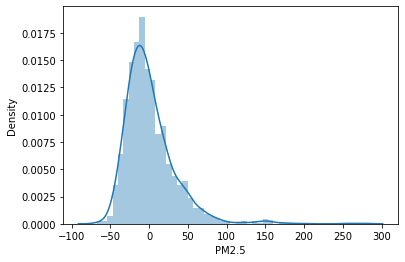

In [ ]:
sns.distplot(y_test-prediction)

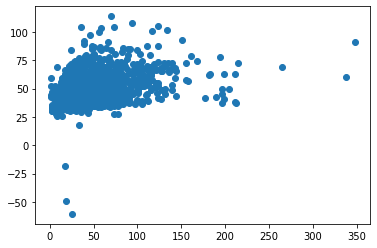

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.206137300966585
MSE: 1099.971203018124
RMSE: 33.165813769876415


In [ ]:
#####KNEAREST NEIGHBOUR REGRESSOR

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()

-2.851788058195491

In [ ]:
prediction=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


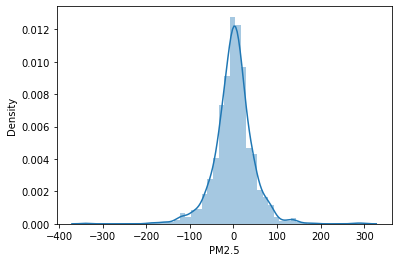

In [ ]:
sns.distplot(y_test-prediction)

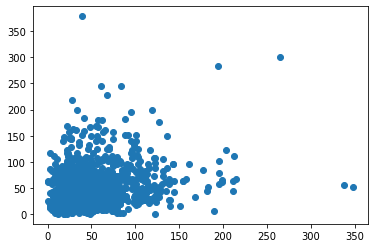

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
#hyperparametertuning
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

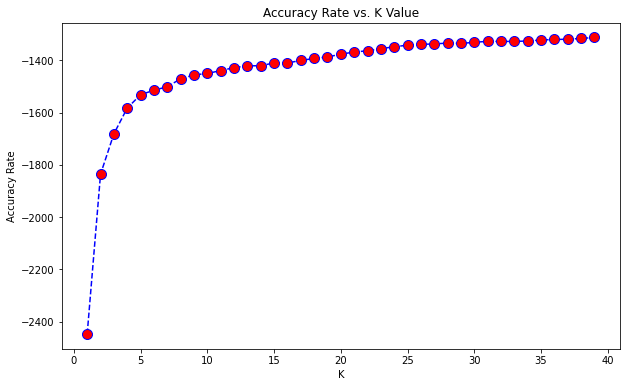

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

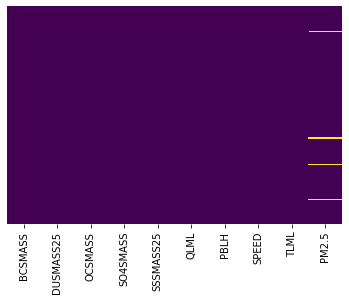

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(ff.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
X=ff.iloc[:,:-1] ## independent features
y=ff.iloc[:,-1] ## dependent features

In [ ]:
X.isnull()

,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4579,False,False,False,False,False,False,False,False,False
4580,False,False,False,False,False,False,False,False,False
4581,False,False,False,False,False,False,False,False,False
4582,False,False,False,False,False,False,False,False,False


In [ ]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4579    False
4580    False
4581    False
4582    False
4583    False
Name: PM2.5, Length: 4584, dtype: bool

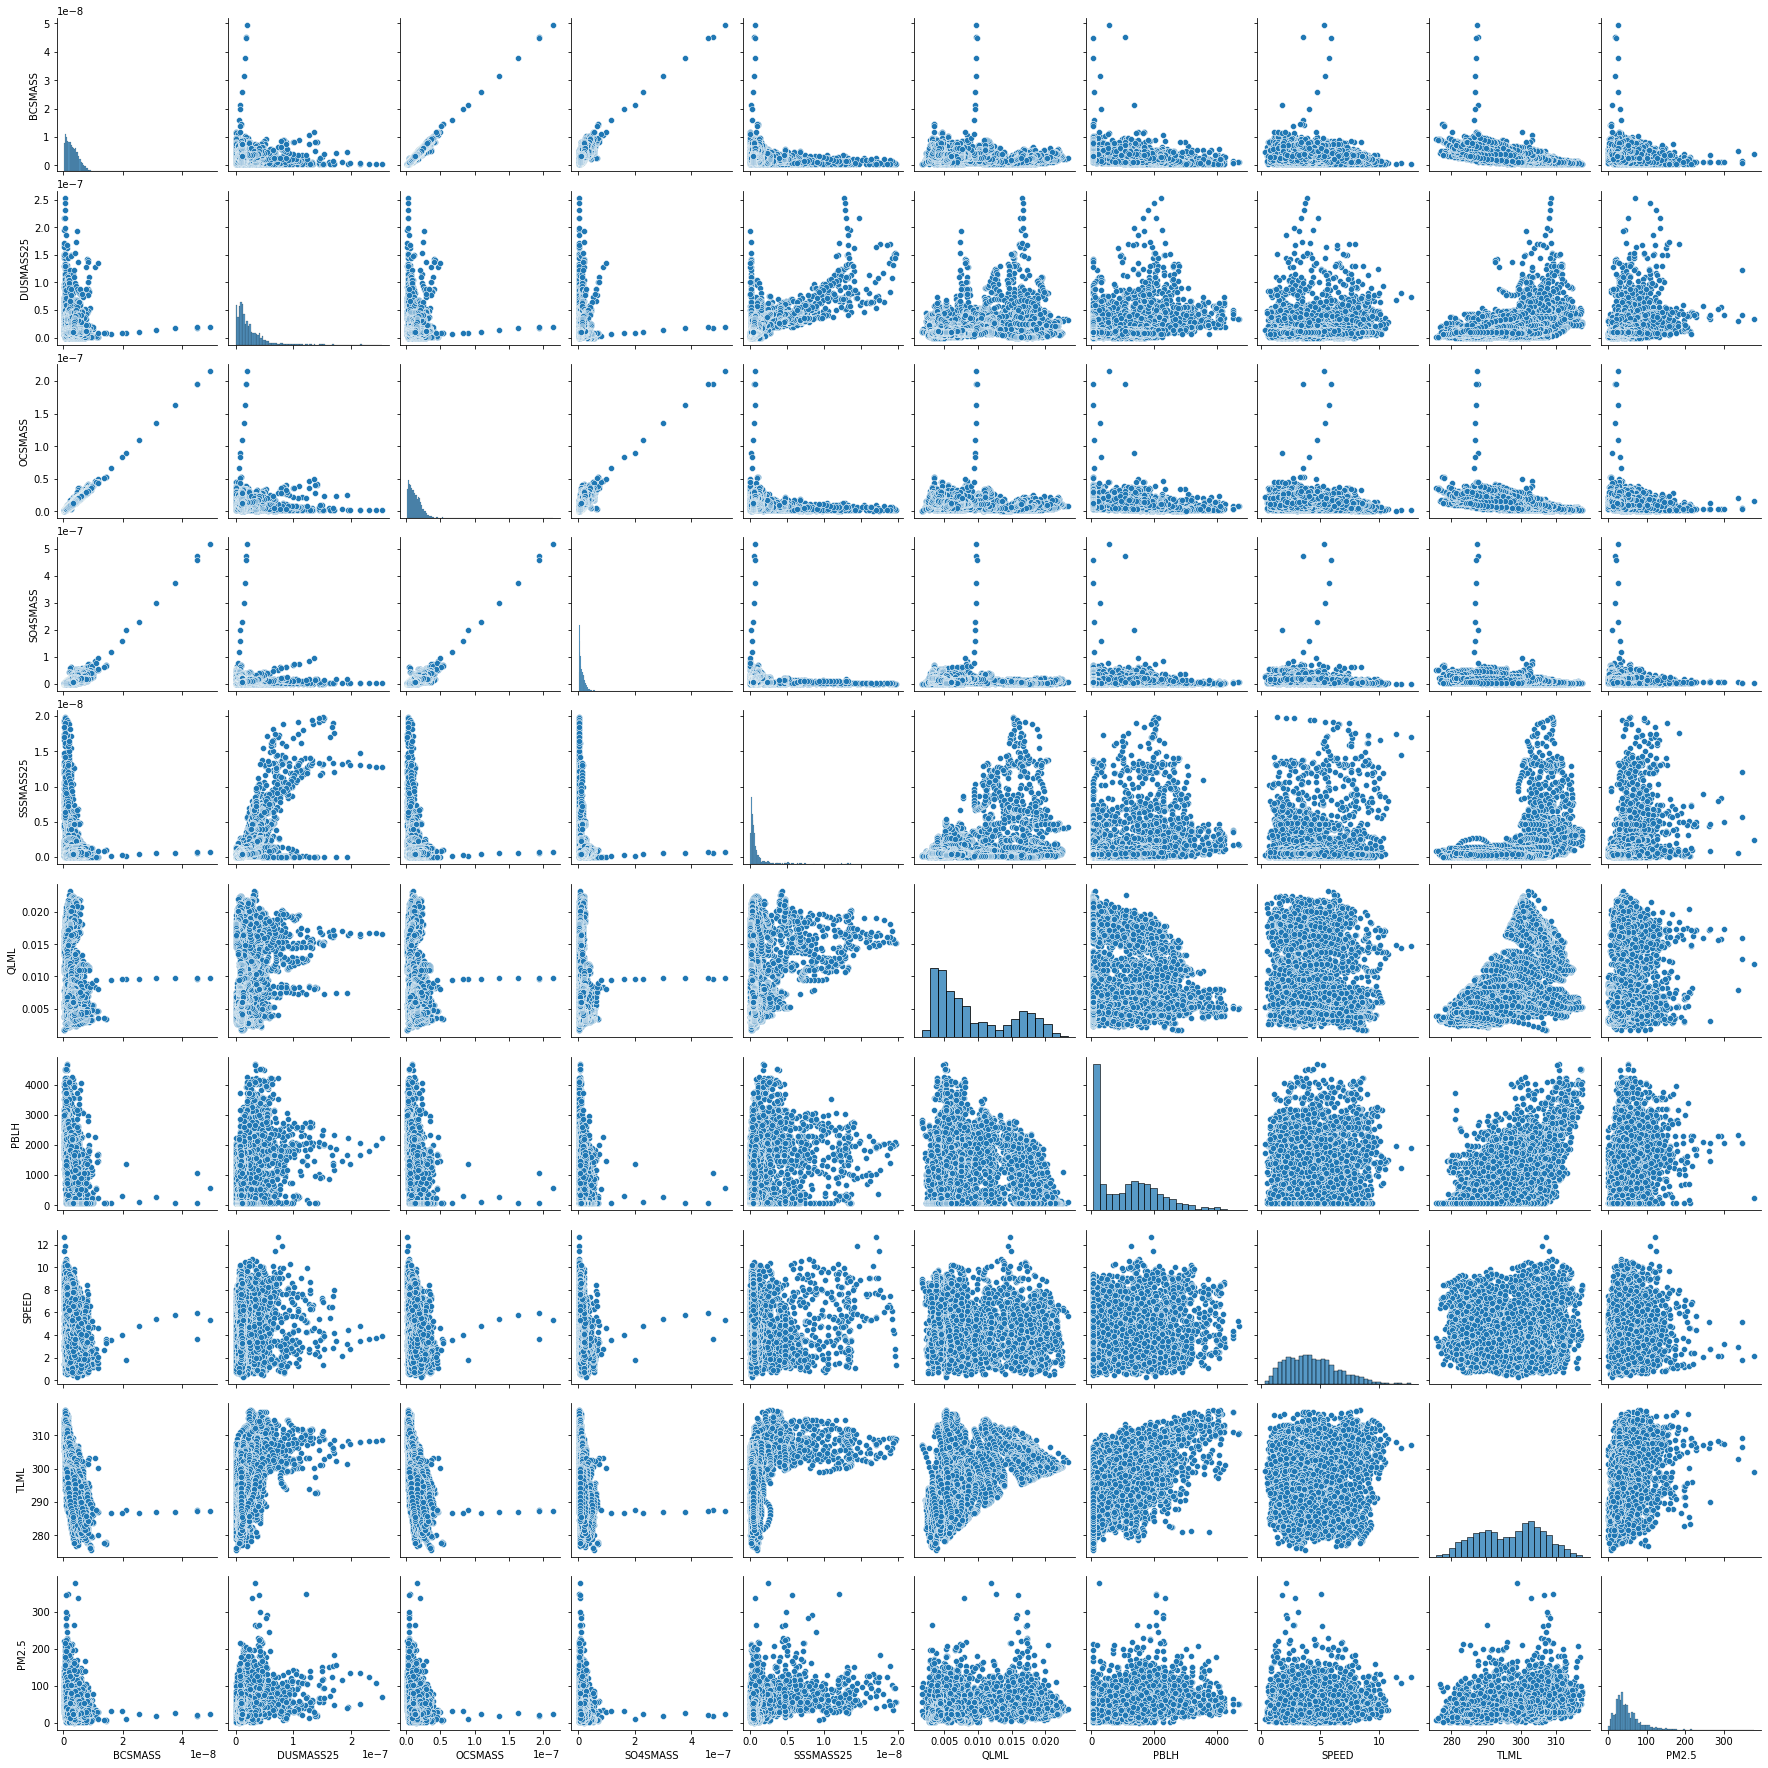

In [ ]:
sns.pairplot(ff)

In [ ]:
ff.corr()

,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML,PM2.5
BCSMASS,1.000000,-0.213612,0.990509,0.802279,-0.273996,-0.311717,-0.453932,-0.206116,-0.591990,-0.235913
DUSMASS25,-0.213612,1.000000,-0.178401,-0.140065,0.716160,0.219653,0.267628,0.046362,0.459807,0.272919
OCSMASS,0.990509,-0.178401,1.000000,0.822003,-0.267815,-0.301787,-0.412677,-0.199605,-0.541242,-0.225335
SO4SMASS,0.802279,-0.140065,0.822003,1.000000,-0.160608,-0.207293,-0.178711,-0.154749,-0.309816,-0.169074
SSSMASS25,-0.273996,0.716160,-0.267815,-0.160608,1.000000,0.330531,0.203724,0.094029,0.433260,0.271180
QLML,-0.311717,0.219653,-0.301787,-0.207293,0.330531,1.000000,-0.011125,-0.074127,0.551573,0.146591
PBLH,-0.453932,0.267628,-0.412677,-0.178711,0.203724,-0.011125,1.000000,0.081448,0.576800,0.252562
SPEED,-0.206116,0.046362,-0.199605,-0.154749,0.094029,-0.074127,0.081448,1.000000,0.028992,0.023227
TLML,-0.591990,0.459807,-0.541242,-0.309816,0.433260,0.551573,0.576800,0.028992,1.000000,0.292818
PM2.5,-0.235913,0.272919,-0.225335,-0.169074,0.271180,0.146591,0.252562,0.023227,0.292818,1.000000


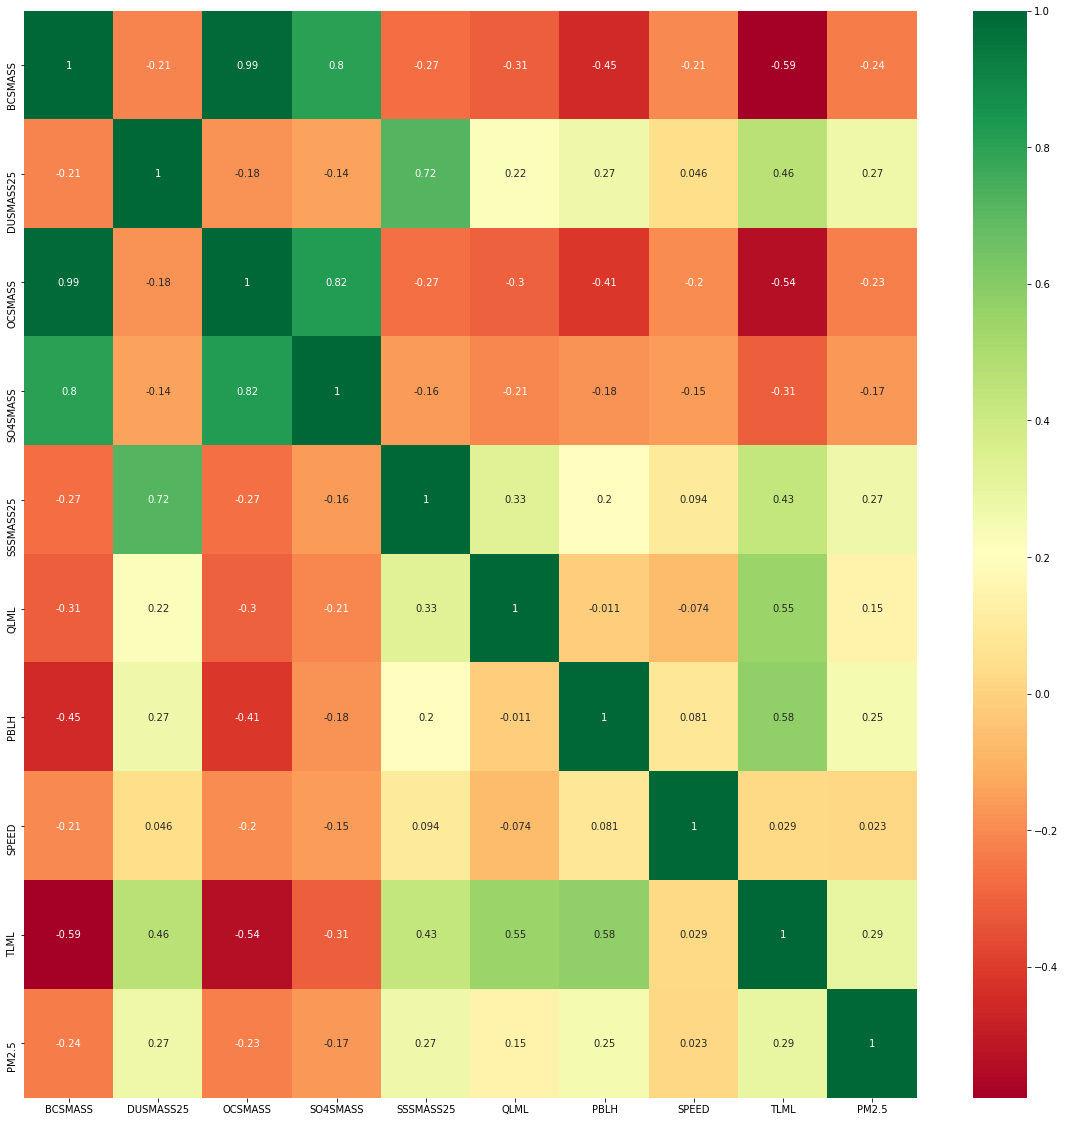

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = ff.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(ff[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:

X.head()

,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML
0,8.060000e-09,1.450000e-08,3.050000e-08,1.820000e-08,4.790000e-10,0.004006,62.500870,5.699530,282.57007
1,8.290000e-09,1.430000e-08,3.130000e-08,1.780000e-08,4.720000e-10,0.004031,62.372560,5.714055,282.00223
2,8.500000e-09,1.400000e-08,3.210000e-08,1.740000e-08,4.620000e-10,0.004063,62.285614,5.596713,281.62170
3,8.340000e-09,1.360000e-08,3.140000e-08,1.680000e-08,4.360000e-10,0.004137,62.437950,4.250904,282.29440
4,7.560000e-09,1.280000e-08,2.840000e-08,1.630000e-08,3.980000e-10,0.004280,80.280690,3.031712,284.87622


In [ ]:
ff=ff.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
215/215 [==============================] - 4s 5ms/step - loss: nan - mean_absolute_error: nan - val_lo

KeyboardInterrupt: ignored

In [ ]:
df3

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML
0,2019-01-05 00:30:00,8.058123e-09,1.454828e-08,3.052992e-08,1.815402e-08,4.786217e-10,0.004006,62.500870,5.699530,282.57007
4,2019-01-05 01:30:00,8.287316e-09,1.432272e-08,3.134483e-08,1.776129e-08,4.724832e-10,0.004031,62.372560,5.714055,282.00223
8,2019-01-05 02:30:00,8.501956e-09,1.403897e-08,3.208697e-08,1.740450e-08,4.622524e-10,0.004063,62.285614,5.596713,281.62170
12,2019-01-05 03:30:00,8.341885e-09,1.357330e-08,3.140303e-08,1.683685e-08,4.361027e-10,0.004137,62.437950,4.250904,282.29440
16,2019-01-05 04:30:00,7.563358e-09,1.278386e-08,2.841989e-08,1.626931e-08,3.982451e-10,0.004280,80.280690,3.031712,284.87622
...,...,...,...,...,...,...,...,...,...,...
18316,2020-02-13 19:30:00,2.663910e-09,1.018998e-08,9.920768e-09,5.743040e-09,3.481353e-10,0.005806,63.734660,8.884251,288.18518
18320,2020-02-13 20:30:00,2.863999e-09,1.026638e-08,1.062654e-08,6.136507e-09,3.571363e-10,0.005943,63.548187,8.839270,287.29504
18324,2020-02-13 21:30:00,3.040441e-09,1.040462e-08,1.124863e-08,6.479500e-09,3.714994e-10,0.006013,63.379000,8.628987,286.56220
18328,2020-02-13 22:30:00,3.213247e-09,1.062654e-08,1.188166e-08,6.836630e-09,3.899918e-10,0.006016,63.254913,8.548103,285.98430


In [ ]:
df0 = pd.read_csv('DPCC_BAM/BAM_Aurobindo.csv')
df0

,Date_Time,Location,PM2.5,PM10,WS,WD,RH,Temp,SR
0,3/1/2019 0:00,SAM,79.0,130,4.72,220.64,99.16,7.36,6.92
1,3/1/2019 1:00,SAM,77.0,119,3.45,237.06,99.16,7.06,6.82
2,3/1/2019 2:00,SAM,83.0,117,2.75,227.78,99.16,7.05,6.81
3,3/1/2019 3:00,SAM,88.0,129,3.32,233.08,99.16,6.80,6.80
4,3/1/2019 4:00,SAM,83.0,119,3.12,282.43,99.16,6.94,6.85
...,...,...,...,...,...,...,...,...,...
8443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df0new=df0[['Date_Time','PM2.5']]
df0new

,Date_Time,PM2.5
0,3/1/2019 0:00,79.0
1,3/1/2019 1:00,77.0
2,3/1/2019 2:00,83.0
3,3/1/2019 3:00,88.0
4,3/1/2019 4:00,83.0
...,...,...
8443,NaN,NaN
8444,NaN,NaN
8445,NaN,NaN
8446,NaN,NaN


In [ ]:
df0new.dropna(subset = ["PM2.5"], inplace=True)
df0new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date_Time,PM2.5
0,3/1/2019 0:00,79.0
1,3/1/2019 1:00,77.0
2,3/1/2019 2:00,83.0
3,3/1/2019 3:00,88.0
4,3/1/2019 4:00,83.0
...,...,...
8419,2/14/2020 19:00,29.0
8420,2/14/2020 20:00,41.0
8421,2/14/2020 21:00,51.0
8422,2/14/2020 22:00,45.0


In [ ]:
df0new = df0new.drop_duplicates('Date_Time')
df0new

,Date_Time,PM2.5
0,3/1/2019 0:00,79.0
1,3/1/2019 1:00,77.0
2,3/1/2019 2:00,83.0
3,3/1/2019 3:00,88.0
4,3/1/2019 4:00,83.0
...,...,...
8420,2/14/2020 20:00,41.0
8421,2/14/2020 21:00,51.0
8422,2/14/2020 22:00,45.0
8423,2/14/2020 23:00,57.0


In [ ]:
df1new['tmp'] = 1
df0new['tmp'] = 1
data = pd.merge(df1new, df0new, on=['tmp'])
data = data.drop('tmp', axis=1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.drop_duplicates(subset ="time", 
                     keep =False )
df3

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML
0,2019-01-05 00:30:00,8.058123e-09,1.454828e-08,3.052992e-08,1.815402e-08,4.786217e-10,0.004006,62.500870,5.699530,282.57007
1,2019-01-05 00:30:00,8.058123e-09,1.454828e-08,3.052992e-08,1.815402e-08,4.786217e-10,0.004100,62.672745,5.178045,283.35132
2,2019-01-05 00:30:00,7.108611e-09,1.503940e-08,2.701563e-08,1.774656e-08,4.981758e-10,0.004006,62.500870,5.699530,282.57007
3,2019-01-05 00:30:00,7.108611e-09,1.503940e-08,2.701563e-08,1.774656e-08,4.981758e-10,0.004100,62.672745,5.178045,283.35132
4,2019-01-05 01:30:00,8.287316e-09,1.432272e-08,3.134483e-08,1.776129e-08,4.724832e-10,0.004031,62.372560,5.714055,282.00223
...,...,...,...,...,...,...,...,...,...,...
18331,2020-02-13 22:30:00,3.063180e-09,1.011722e-08,1.151058e-08,7.387784e-09,4.242116e-10,0.006376,63.379913,9.177010,286.50775
18332,2020-02-13 23:30:00,3.392419e-09,1.092485e-08,1.255833e-08,7.245332e-09,4.115097e-10,0.005991,63.123680,8.573555,285.39230
18333,2020-02-13 23:30:00,3.392419e-09,1.092485e-08,1.255833e-08,7.245332e-09,4.115097e-10,0.006306,63.248680,9.198555,285.97824
18334,2020-02-13 23:30:00,3.210520e-09,1.022272e-08,1.208176e-08,7.630958e-09,4.353839e-10,0.005991,63.123680,8.573555,285.39230


In [ ]:
#df3.sort_values("time", inplace = True)
df3.drop_duplicates(subset ="time", 
                     keep ='last' )
df3.set_index("time", inplace = True)
df3.index

Index(['2000-01-04 00:30:00', '2000-01-04 00:30:00', '2000-01-04 00:30:00',
       '2000-01-04 00:30:00', '2000-01-04 00:30:00', '2000-01-04 00:30:00',
       '2000-01-04 00:30:00', '2000-01-04 00:30:00', '2000-01-04 00:30:00',
       '2000-01-04 00:30:00',
       ...
       '2020-09-29 21:30:00', '2020-09-29 21:30:00', '2020-09-29 22:30:00',
       '2020-09-29 22:30:00', '2020-09-29 22:30:00', '2020-09-29 22:30:00',
       '2020-09-29 23:30:00', '2020-09-29 23:30:00', '2020-09-29 23:30:00',
       '2020-09-29 23:30:00'],
      dtype='object', name='time', length=364032)

KeyError: ignored

In [ ]:
df3.tail()

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML


In [ ]:

df3.loc[(df3['time'] == "2019-01-03 00:30:00"): (df3['time'] == "2020-02-14 00:30:00")]
df3

KeyError: ignored

In [ ]:
df4=pd.merge(df3,df2new,right_index=True, left_index=True )

In [ ]:
df4

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML,time_of_measurement,aerosol_optical_thickness_550_count_land,aerosol_optical_thickness_550_land
0,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001942,62.871986,2.749119,284.26566,NaN,0.0,NaN
1,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001893,62.856360,3.306736,284.17972,NaN,0.0,NaN
2,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001942,62.871986,2.749119,284.26566,NaN,0.0,NaN
3,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001893,62.856360,3.306736,284.17972,NaN,0.0,NaN
4,2000-01-04 00:30:00,4.323740e-09,2.727575e-09,1.629088e-08,4.668636e-09,3.587262e-11,0.001942,62.871986,2.749119,284.26566,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94549,2003-09-17 21:30:00,2.976776e-09,3.836249e-09,1.155786e-08,5.098637e-09,3.174137e-10,0.018184,65.971080,0.934608,298.24320,NaN,0.0,NaN
94550,2003-09-17 21:30:00,2.466550e-09,3.921741e-09,9.807992e-09,4.434706e-09,3.101377e-10,0.018428,65.939830,1.500770,298.14944,NaN,0.0,NaN
94551,2003-09-17 21:30:00,2.466550e-09,3.921741e-09,9.807992e-09,4.434706e-09,3.101377e-10,0.018184,65.971080,0.934608,298.24320,NaN,0.0,NaN
94552,2003-09-17 22:30:00,3.188689e-09,3.850801e-09,1.236913e-08,5.189603e-09,3.151399e-10,0.018390,65.898790,0.647638,297.95070,NaN,0.0,NaN


In [ ]:
df0 = pd.read_csv('DPCC_BAM/BAM_Aurobindo.csv')
df0.shape

(8448, 9)

In [ ]:
df0.head()


,Date_Time,Location,PM2.5,PM10,WS,WD,RH,Temp,SR
0,3/1/2019 0:00,SAM,79.0,130,4.72,220.64,99.16,7.36,6.92
1,3/1/2019 1:00,SAM,77.0,119,3.45,237.06,99.16,7.06,6.82
2,3/1/2019 2:00,SAM,83.0,117,2.75,227.78,99.16,7.05,6.81
3,3/1/2019 3:00,SAM,88.0,129,3.32,233.08,99.16,6.80,6.80
4,3/1/2019 4:00,SAM,83.0,119,3.12,282.43,99.16,6.94,6.85


In [ ]:
df5=pd.merge(df4,df0,right_index=True, left_index=True )
df5

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML,time_of_measurement,aerosol_optical_thickness_550_count_land,aerosol_optical_thickness_550_land,Date_Time,Location,PM2.5,PM10,WS,WD,RH,Temp,SR
0,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001942,62.871986,2.749119,284.26566,NaN,0.0,NaN,3/1/2019 0:00,SAM,79.0,130,4.72,220.64,99.16,7.36,6.92
1,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001893,62.856360,3.306736,284.17972,NaN,0.0,NaN,3/1/2019 1:00,SAM,77.0,119,3.45,237.06,99.16,7.06,6.82
2,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001942,62.871986,2.749119,284.26566,NaN,0.0,NaN,3/1/2019 2:00,SAM,83.0,117,2.75,227.78,99.16,7.05,6.81
3,2000-01-04 00:30:00,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001893,62.856360,3.306736,284.17972,NaN,0.0,NaN,3/1/2019 3:00,SAM,88.0,129,3.32,233.08,99.16,6.80,6.80
4,2000-01-04 00:30:00,4.323740e-09,2.727575e-09,1.629088e-08,4.668636e-09,3.587262e-11,0.001942,62.871986,2.749119,284.26566,NaN,0.0,NaN,3/1/2019 4:00,SAM,83.0,119,3.12,282.43,99.16,6.94,6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,2000-03-29 23:30:00,3.807146e-09,4.087633e-08,1.546869e-08,5.752912e-09,5.154659e-10,0.003944,65.740210,2.261707,297.24927,2001-10-04 06:45:05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8444,2000-03-29 23:30:00,4.321920e-09,4.027970e-08,1.706940e-08,5.334545e-09,5.168301e-10,0.003607,65.771460,1.612292,297.37427,2001-10-04 06:45:05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8445,2000-03-29 23:30:00,4.321920e-09,4.027970e-08,1.706940e-08,5.334545e-09,5.168301e-10,0.003944,65.740210,2.261707,297.24927,2001-10-04 06:45:05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8446,2000-03-29 23:30:00,3.807146e-09,4.087633e-08,1.546869e-08,5.752912e-09,5.154659e-10,0.003607,65.771460,1.612292,297.37427,2001-10-04 06:45:05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df0['Date_Time']

0       3/1/2019 0:00
1       3/1/2019 1:00
2       3/1/2019 2:00
3       3/1/2019 3:00
4       3/1/2019 4:00
            ...      
8443              NaN
8444              NaN
8445              NaN
8446              NaN
8447              NaN
Name: Date_Time, Length: 8448, dtype: object

In [ ]:
pd.Series.dt
df0['Date_Time'] = pd.to_datetime(df0['Date_Time'], errors='coerce')
#file = 'aod.csv'
#df0 = pd.read_csv(file, sep = ',', parse_dates= [col],encoding='utf-8-sig', usecols= ['Date_Time', 'ids'],) 

#df0['Date_Time'] = df0['Date_Time'].dt.strftime('%m-%d-%Y')

In [ ]:
df0.head()

,Date_Time,Location,PM2.5,PM10,WS,WD,RH,Temp,SR
0,2019-03-01 00:00:00,SAM,79.0,130,4.72,220.64,99.16,7.36,6.92
1,2019-03-01 01:00:00,SAM,77.0,119,3.45,237.06,99.16,7.06,6.82
2,2019-03-01 02:00:00,SAM,83.0,117,2.75,227.78,99.16,7.05,6.81
3,2019-03-01 03:00:00,SAM,88.0,129,3.32,233.08,99.16,6.80,6.80
4,2019-03-01 04:00:00,SAM,83.0,119,3.12,282.43,99.16,6.94,6.85


In [ ]:
df0.tail()

,Date_Time,Location,PM2.5,PM10,WS,WD,RH,Temp,SR
8443,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8444,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8445,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8446,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8447,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df0=df0.rename(columns ={'Date_Time':'time'}, inplace = False)
df0

,time,Location,PM2.5,PM10,WS,WD,RH,Temp,SR
0,2019-03-01 00:00:00,SAM,79.0,130,4.72,220.64,99.16,7.36,6.92
1,2019-03-01 01:00:00,SAM,77.0,119,3.45,237.06,99.16,7.06,6.82
2,2019-03-01 02:00:00,SAM,83.0,117,2.75,227.78,99.16,7.05,6.81
3,2019-03-01 03:00:00,SAM,88.0,129,3.32,233.08,99.16,6.80,6.80
4,2019-03-01 04:00:00,SAM,83.0,119,3.12,282.43,99.16,6.94,6.85
...,...,...,...,...,...,...,...,...,...
8443,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8444,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8445,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8446,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3["time"]= pd.to_datetime(df3["time"])
df3["time"] = df3["time"].map(lambda t: t.strftime('%Y-%m-%d %H:%M'))



In [ ]:
df3.head()

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML
297359,2017-04-16 11:30,8.312782e-10,2.158777e-08,5.298716e-09,4.885862e-09,1.058411e-09,0.002994,2541.24070,4.521420,314.30585
297360,2017-04-16 12:30,1.124136e-09,2.731394e-08,6.742994e-09,4.683903e-09,1.503853e-09,0.003442,1016.53235,4.868994,313.47635
297361,2017-04-16 12:30,1.124136e-09,2.731394e-08,6.742994e-09,4.683903e-09,1.503853e-09,0.003096,992.03235,4.921728,313.71072
297362,2017-04-16 12:30,1.019089e-09,2.303568e-08,6.115443e-09,5.131374e-09,1.148240e-09,0.003442,1016.53235,4.868994,313.47635
297363,2017-04-16 12:30,1.019089e-09,2.303568e-08,6.115443e-09,5.131374e-09,1.148240e-09,0.003096,992.03235,4.921728,313.71072


In [ ]:
df3

,time,BCSMASS,DUSMASS25,OCSMASS,SO4SMASS,SSSMASS25,QLML,PBLH,SPEED,TLML
0,2000-01-04 00:30,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001942,62.871986,2.749119,284.26566
1,2000-01-04 00:30,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001893,62.856360,3.306736,284.17972
2,2000-01-04 00:30,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001942,62.871986,2.749119,284.26566
3,2000-01-04 00:30,4.505639e-09,2.899469e-09,1.675654e-08,4.388512e-09,3.651211e-11,0.001893,62.856360,3.306736,284.17972
4,2000-01-04 00:30,4.323740e-09,2.727575e-09,1.629088e-08,4.668636e-09,3.587262e-11,0.001942,62.871986,2.749119,284.26566
...,...,...,...,...,...,...,...,...,...,...
364027,2020-09-29 22:30,3.376954e-09,2.996239e-08,1.466835e-08,6.070155e-09,1.940862e-09,0.009881,66.218730,5.575842,296.63700
364028,2020-09-29 23:30,4.145477e-09,3.007881e-08,1.717856e-08,4.804408e-09,2.124580e-09,0.010419,115.427185,4.324774,296.30230
364029,2020-09-29 23:30,4.145477e-09,3.007881e-08,1.717856e-08,4.804408e-09,2.124580e-09,0.009900,65.505310,5.385321,296.13043
364030,2020-09-29 23:30,3.489731e-09,3.055902e-08,1.514129e-08,6.290522e-09,1.932676e-09,0.010419,115.427185,4.324774,296.30230


In [ ]:
df3 = df3.iloc[297359:,]
#df.drop(297359,axis=0,)
#df3=df3['time'=]
#print(df3['time'].where(df3['time'] = '2018-12-31 23:30'))

In [ ]:
pd.to_datetime('Mon Nov 02 20:37:10 GMT+00:00 2015')

In [ ]:
dtime='0000-00-00 00:30'
dtime=pd.to_datetime(dtime)
dtime=dtime.map(lambda t: t.strftime('%Y-%m-%d %H:%M'))
df3['time']=df3['time']-dtime

ParserError: ignored

In [ ]:
pd.merge_asof(df3, df0, on='', by='time', tolerance=pd.Timedelta('30M'))

KeyError: ignored